# Continuous Control

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import *

In [2]:
# For this implimentation we will be using the multiple reacher enviroment  
multi = './Reacher.app'
env = UnityEnvironment(file_name=multi)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [6]:
def ddpg(n_episodes=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    agent_scores = []
    for i_episode in (range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = 0.
        individual_scores = np.zeros(num_agents)
        batch_size = 1
        lstm_h_actor = torch.zeros(batch_size, action_size)
        lstm_c_actor = torch.zeros(batch_size, action_size)
        lstm_h_critic = torch.zeros(20,16)
        lstm_c_critic = torch.zeros(20,16)
        hidden = {
            'actor' : (lstm_h_actor, lstm_c_actor),
            'critic' : (lstm_h_critic, lstm_c_critic)
        }
        while True:
            action = agent.act(state, hidden)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += np.mean(reward)
            individual_scores += reward
            if np.any(done):
                break 
        scores_deque.append(score)
        scores.append(score)
        agent_scores.append(individual_scores)
        print('\rEpisode {}\tReward: {:.2f}\tAverage Reward: {:.2f}'.format(i_episode, score, np.mean(scores_deque)), end="")
        
        if i_episode % 5 == 0:
            print('\rEpisode {}\tReward: {:.2f}\tAverage Reward: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        if sum(np.array(scores_deque)>=30)>=100:
            print('\n\nEnvironment Solved in {:d} episodes!\tAverage Reward: {:.2f}'.format(i_episode-100,
                                                                                          np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
            
    return scores, agent_scores

random_seed = 0                         
agent = Agent(state_size, action_size, random_seed, num_agents)
scores, agent_scores = ddpg()

Episode 5	Reward: 1.06	Average Reward: 1.21
Episode 10	Reward: 1.55	Average Reward: 1.34
Episode 15	Reward: 2.89	Average Reward: 1.65
Episode 20	Reward: 6.05	Average Reward: 2.42
Episode 25	Reward: 8.75	Average Reward: 3.43
Episode 30	Reward: 12.49	Average Reward: 4.78
Episode 35	Reward: 20.65	Average Reward: 6.54
Episode 40	Reward: 26.76	Average Reward: 8.70
Episode 45	Reward: 29.71	Average Reward: 10.96
Episode 50	Reward: 33.93	Average Reward: 13.12
Episode 55	Reward: 33.53	Average Reward: 14.98
Episode 60	Reward: 35.11	Average Reward: 16.59
Episode 65	Reward: 35.84	Average Reward: 18.04
Episode 70	Reward: 36.49	Average Reward: 19.36
Episode 75	Reward: 36.69	Average Reward: 20.53
Episode 80	Reward: 36.71	Average Reward: 21.51
Episode 85	Reward: 33.49	Average Reward: 22.30
Episode 90	Reward: 35.03	Average Reward: 23.01
Episode 95	Reward: 36.07	Average Reward: 23.71
Episode 100	Reward: 36.26	Average Reward: 24.32
Episode 105	Reward: 35.80	Average Reward: 26.11
Episode 110	Reward: 36.39

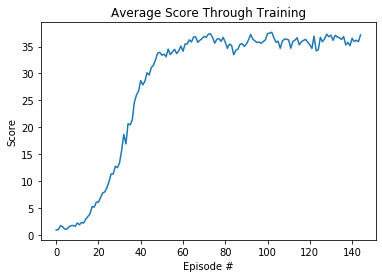

In [15]:
# Plot results
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.title('Average Score Through Training')
plt.plot(scores)
